### 1 - import librarys

In [13]:
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import time
import joblib
from joblib import load
import matplotlib.pyplot as plt

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - chargement de jeu de donnés test

In [3]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### 4 - chargement de modèle

In [5]:
model_rf = joblib.load('model_rf.joblib')

In [6]:
linreg=load('linreg.joblib')

In [19]:
model_rf

RandomForestRegressor(max_depth=25, max_features='log2', max_samples=0.9,
                      n_estimators=1000, oob_score=True, random_state=42,
                      warm_start=True)

### 5 - performance

In [27]:
y_predict = model_rf.predict(X_test)

In [29]:
rmse = mean_squared_error(y_test, y_predict, squared=False)
#r2 = round(rf.score(X, y),2)
r2 = model_rf.score(X_test, y_test)
print("La performance du modèle pour le jeu de test")
print("--------------------------------------")
print(f'La RMSE est {round(rmse,2)}')
print(f'Le score R2 est {round(r2,2)}')
print(f'error moyenne de prix est {round(rmse,2)*100000} USD')

La performance du modèle pour le jeu de test
--------------------------------------
La RMSE est 0.49
Le score R2 est 0.82
error moyenne de prix est 49000.0 USD


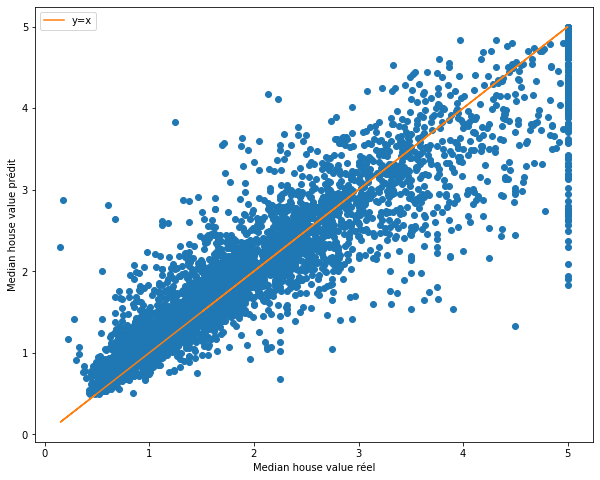

In [14]:
plt.figure(figsize=(10,8))
plt.plot(y_test,y_predict,'o')
plt.plot(y_test,y_test,label='y=x')
plt.xlabel('Median house value réel')
plt.ylabel('Median house value prédit')
plt.legend()
plt.show()

In [15]:
linreg.fit(X_test,y_test)

LinearRegression()

In [23]:
y_predict = linreg.predict(X_test)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = round(linreg.score(X_test, y_test),2)

print("La performance du modèle pour le jeu de test")
print("--------------------------------------")
print(f'La RMSE est {round(rmse,2)}')
print(f'Le score R2 est {round(r2,2)}')
print(f'error moyenne de prix est {round(rmse,2)*100000} USD')

La performance du modèle pour le jeu de test
--------------------------------------
La RMSE est 0.73
Le score R2 est 0.6
error moyenne de prix est 73000.0 USD


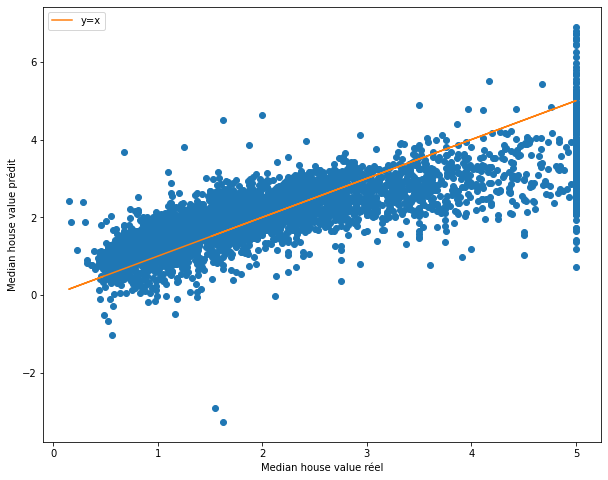

In [18]:
plt.figure(figsize=(10,8))
plt.plot(y_test,y_predict,'o')
plt.plot(y_test,y_test,label='y=x')
plt.xlabel('Median house value réel')
plt.ylabel('Median house value prédit')
plt.legend()
plt.show()